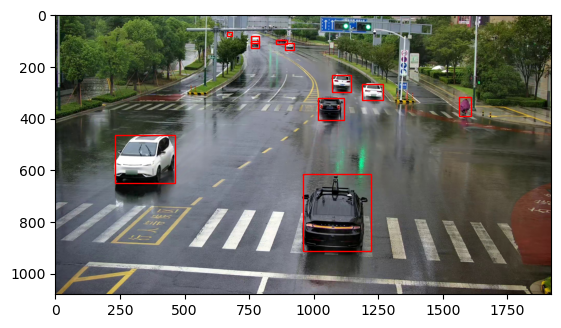

In [2]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# 路径定义
image_path = '../../doc/jpg_exh/1692688072199.jpg'
json_path = '../../doc/jpg_exh/1692688072199.json'

# 加载图像
image = Image.open(image_path)



# 加载JSON文件
with open(json_path) as f:
    data = json.load(f)

# 创建图和坐标轴
fig, ax = plt.subplots(1)
ax.imshow(image)

# 在图像上绘制边界框
for item in data['label']:
    # 提取坐标并转换为float类型
    x1, y1, x2, y2 = map(float, item['box2d'])
    # 创建一个矩形patch
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    # 添加这个矩形到列表中
    ax.add_patch(rect)

# 显示图像和边界框
plt.show()

In [7]:
import numpy as np  
# 将图像转换为 NumPy 数组  
image_array = np.array(image)  

# 打印数组的形状  
print("数组的形状:", image_array.shape)

数组的形状: (1080, 1920, 3)


In [3]:
import torch

tensor = torch.from_numpy(image_array)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  
tensor = tensor.to(device)

In [9]:

import open3d as o3d
import numpy as np
import json

# 读取点云文件
pcd_path = '../../doc/point_exh/1692688072199.pcd'
pcd = o3d.io.read_point_cloud(pcd_path)

In [12]:
print(pcd)

PointCloud with 124959 points.


In [20]:
import os  
import torch 
  
# 定义目录路径  
directory_path = "/Users/gek/Downloads/训练数据集2/训练数据集2/原始数据（已脱敏）/G05M00_20230822150752/lidar"  
  
# 遍历目录并获取所有文件的绝对路径  
for root, dirs, files in os.walk(directory_path):  
    for file in files:  
        file_path = os.path.join(root, file)  
        pcd = o3d.io.read_point_cloud(file_path)
        xyz = pcd.points  
        point_cloud_tensor = torch.zeros((len(xyz), 3))  
        
        # 将点云数据赋值给tensor  
for i, point in enumerate(xyz):  
    point_cloud_tensor[i] = torch.tensor([point[0], point[1], point[2]])  
  
# 将tensor转换为PyTorch张量  
point_cloud_tensor = torch.tensor(point_cloud_tensor)

print(point_cloud_tensor)

tensor([[ 25.1622, -29.1043,   2.8479],
        [ 22.0372, -33.1016,   2.9802],
        [ 19.8932, -34.6588,   4.2687],
        ...,
        [ 41.2999,  -6.0212,   1.3680],
        [ 38.1290, -12.9751,   0.5845],
        [ 31.6389, -26.7893,   1.5174]])


/var/folders/2w/t4w5x36s30s2fdtf8_b8rfjc0000gn/T/ipykernel_48623/280067797.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  point_cloud_tensor = torch.tensor(point_cloud_tensor)
